<a href="https://colab.research.google.com/github/BharatSuthar21/Calculus/blob/main/Ellipse_Arc_length_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import math
from scipy.integrate import quad
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# finding arc length using Integration

$$L(f(x)) = ∫_{x_1}^{x_2}|\frac{dr⃗}{dt}|dt$$

But for ellipse integrand is much complex so we are doing there numerical integration. And then we'll have to guess the function using Linear Regression.

In [14]:
# function which is integrated  with the help of quad
def f(x, a, b):
    return ((a*math.sin(x))**2 + (b*math.cos(x))**2)**(0.5)

def g(x):
  return f(x, a, b)

In [19]:
# list required to store the data
a_list = []
b_list = []
result = []
circle = []
verify = []

# calculating the values of a and b
for i in range(20,41):
  for j in range(1,21):
    a_list.append(i*0.1)
    b_list.append(j*0.1)

# calculating the value of perimeter of ellipse and verifying it
for i in range(420):
  a = a_list[i]
  b= b_list[i]
  c= quad(g, 0, math.pi)
  if a == b:
    circle.append((2*c[0],a))
    verify.append((2*math.pi*a,a))
  result.append(2*c[0])

# print(result)
# verifying the perimeter of ellipse as circle is its special case
print(circle)
print(verify)

[(12.566370614359172, 2.0)]
[(12.566370614359172, 2.0)]


# finding arc length using Srinivasa Ramanujan equation

arc length of Ellipse:
$$ Π\left[3(a+b)-\sqrt{(3a+b)(3b+a)}\right]$$
that's somewhat approximation

the more accurate equation is:
$$Π(a+b)(1+\dfrac{3h}{10+\sqrt{4-3h}})$$

here we'll find arc length using 2nd equation that's more accurate

In [16]:
arclength = []
for i in range(420):
  a = a_list[i]
  b = b_list[i]
  h = ((a-b)/(a+b))**2
  res = math.pi*(a+b)*(1+3*h/(10+(4-3*h)**0.5))
  arclength.append(res)

In [17]:
# create subplots with two columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# add the first scatter plot to the left subplot
fig.add_trace(go.Scatter3d(x=a_list, y=b_list, z=result, mode='markers'), row=1, col=1)

# add the second scatter plot to the right subplot
fig.add_trace(go.Scatter3d(x=a_list, y=b_list, z=arclength, mode='markers'), row=1, col=2)

fig.show()

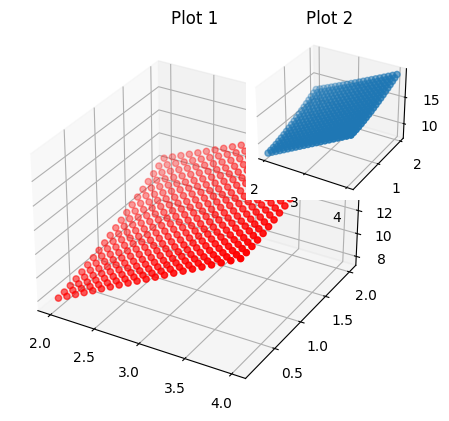

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(a_list, b_list, result, color = 'red')
ax1.set_title('Plot 1')

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(a_list, b_list, arclength)
ax2.set_title('Plot 2')

plt.show()